## 使用kNN手写数字识别

### 1. 导入数据

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# import touch
import os

# 读取mnist数据集
print(help(np.loadtxt))
m_x = np.loadtxt('mnist_x',delimiter=' ')
print(m_x.shape)
print(m_x)
print(m_x[0])
m_y = np.loadtxt('mnist_y')
print(m_y.shape)
print(m_y)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
  

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    

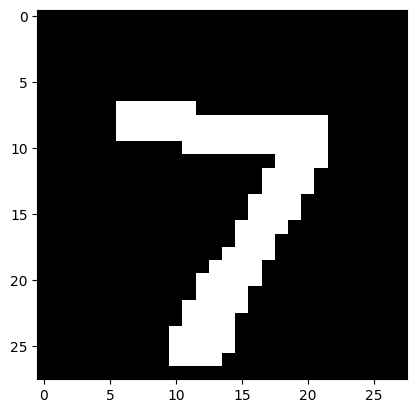

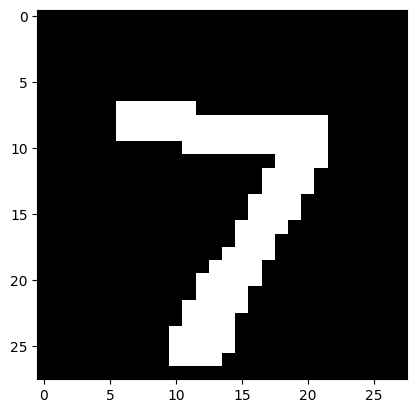

In [18]:
# 数据集可视化
data = np.reshape(m_x[0],[28,28])
plt.figure()
plt.imshow(data,cmap='gray')
print(help(plt.imshow))

data_int = np.reshape(np.array(m_x[0],dtype=int),[28,28])
plt.figure()
plt.imshow(data_int,cmap='gray')

### 2. 数据可视化

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    

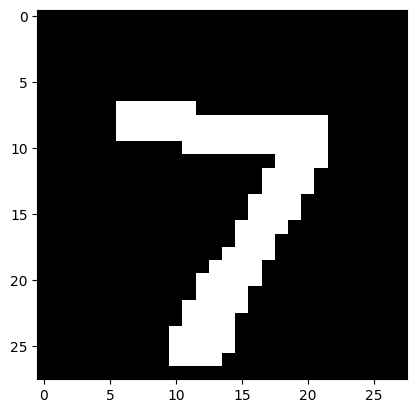

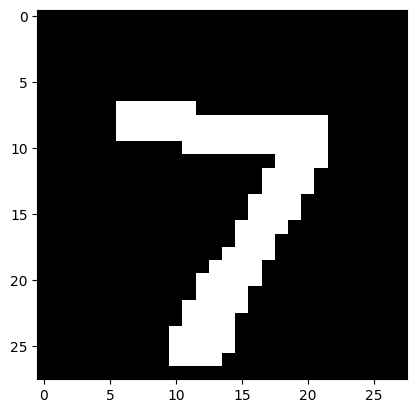

In [21]:
# 数据集可视化
data = np.reshape(m_x[0],[28,28])
plt.figure()
plt.imshow(data,cmap='gray')
print(help(plt.imshow))

data_int = np.reshape(np.array(m_x[0],dtype=int),[28,28])
plt.figure()
plt.imshow(data_int,cmap='gray')

### 3. 数据集划分

In [29]:
# 将数据集分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)
np.random.seed(0)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]
x_train, y_train = m_x[:split], m_y[:split]
x_test, y_test = m_x[split:], m_y[split:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x = x_train[0]
dst = list(map(lambda a: distance(a,x), x_train))
print(dst[:5])

(800, 784)
(800,)
(200, 784)
(200,)
[0.0, 10.0, 10.723805294763608, 13.228756555322953, 11.489125293076057]


### 4. kNN具体实现

In [24]:
# 定义欧式距离
def distance(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

In [25]:
# kNN算法类
class kNN:
    def __init__(self,k,label_num):
        self.k = k
        self.label_num = label_num # 类别数量
    
    def fit(self,x_train,y_train): # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train
    
    def get_knn_indices(self,x): # 获取距离目标样本x最近的K个样本的下标
        # 计算目标样本到所有训练集中样本的距离
        dst = list(map(lambda a: distance(a,x), self.x_train))
        # 按距离从小到大排序，并返回下标
        knn_indices = np.argsort(dst)
        # 取最近的k个
        knn_indices = knn_indices[:self.k]
        return knn_indices